In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from PIL import Image
import copy

from voxel_map_utils import FeatureMap2D, GridMap2D, create_circle


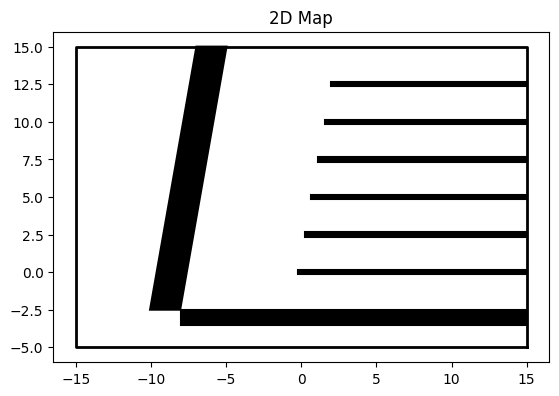

In [2]:
filename = "pkl/headland.pkl"
with open(filename, "rb") as f:
    obstacles = pickle.load(f)

polys = [Polygon(obstacle) for obstacle in obstacles]
# print("Number of obstacles:", len(obstacles))

# Create a feature map
feature_map = FeatureMap2D(x_min=-15, x_max=15, y_min=-5, y_max=15)
feature_map.add_polygons(polys)

# Plot feature map
fig, ax = plt.subplots(1, 1)
feature_map.draw(ax, title="2D Map")

# Generate grid map
resolution = 0.1  # m
grid_map = feature_map.to_gridmap(resolution, use_raster=True)

In [3]:
occupancy_map = copy.deepcopy(grid_map.grid.T)
occupancy_map = np.flip(occupancy_map, axis=0)

binary_map = np.where(occupancy_map == 0, 255, 0).astype(np.uint8)

img = Image.fromarray(binary_map)
img.save('headland_map.png')